In [1]:
import wrangle as w
import explore as e
import acquire as a

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

In [2]:
train, validate, test = w.split_data()

In [3]:
train.head()

,repo,language,original,basic_clean,clean,stemmed,lemmatized,word_count,stopword_count,stopword_ratio,compound_sentiment
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,2320,884,38.10,0.9985
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalk br span stylefont...,div aligncenterh2videoretalk br span stylefont...,535,145,27.10,0.9766
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,1422,507,35.65,0.9968
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,661,256,38.73,-0.9940
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future of cloud data analyti...,h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1d...,h1 aligncenterth futur cloud data analyticsh1d...,778,258,33.16,0.9971


In [4]:
python = train[train.language == 'Python']
java = train[train.language == 'JavaScript']
rust = train[train.language == 'Rust']

In [5]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
python_words = clean(' '.join(python['lemmatized']))
java_words = clean(' '.join(java['lemmatized']))
rust_words = clean(' '.join(rust['lemmatized']))
all_words = clean(' '.join(train['lemmatized']))

In [7]:
len(python_words), len(java_words), len(rust_words), len(all_words)

(38947, 81415, 38705, 159067)

In [8]:
len(python_words) + len(java_words) + len(rust_words) == len(all_words)

True

In [9]:
python_freq = pd.Series(python_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
rust_freq = pd.Series(rust_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [10]:
all_freqs = pd.concat([python_freq, java_freq, rust_freq, all_freq], 
                      axis=1).fillna(0).astype(int)
all_freqs.columns =['python', 'java', 'rust', 'all']

In [11]:
all_freqs

,python,java,rust,all
close,563,11,8,582
intern,536,26,7,569
use,522,1053,501,2076
engin,509,140,52,701
softwar,479,19,17,515
...,...,...,...,...
indexth,0,0,1,1
sensorshttpsclementtsanggithubiobottomnightlyusagewidgetstemperatur,0,0,1,1
ivf,0,0,1,1
usagehttpsclementtsanggithubiobottomnightlyusagewidgetsbatteri,0,0,1,1


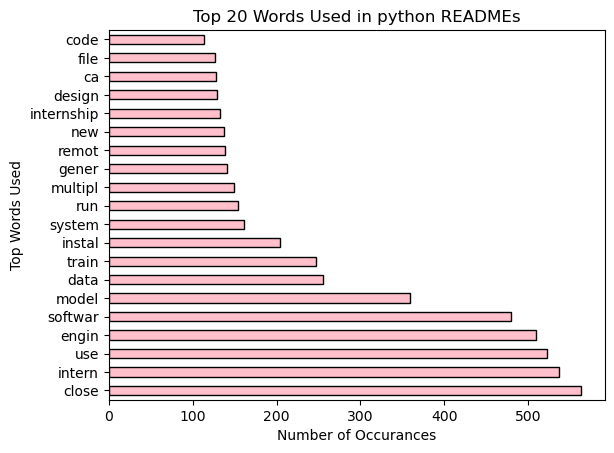

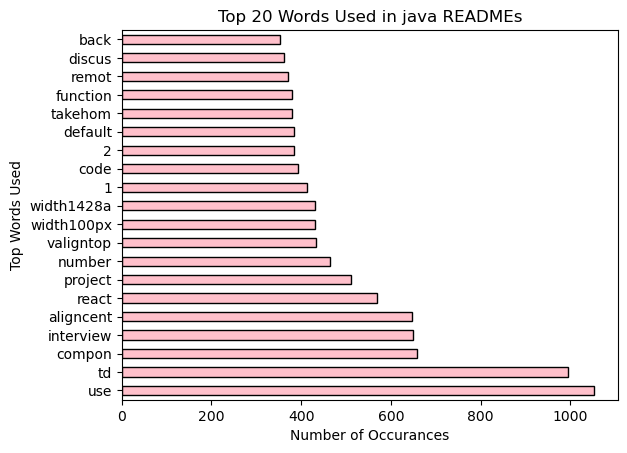

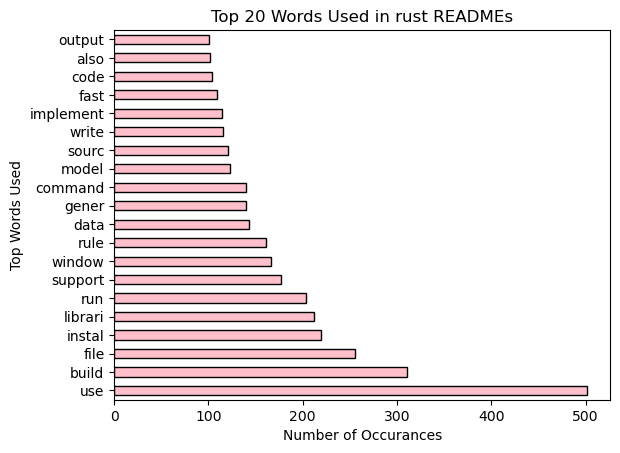

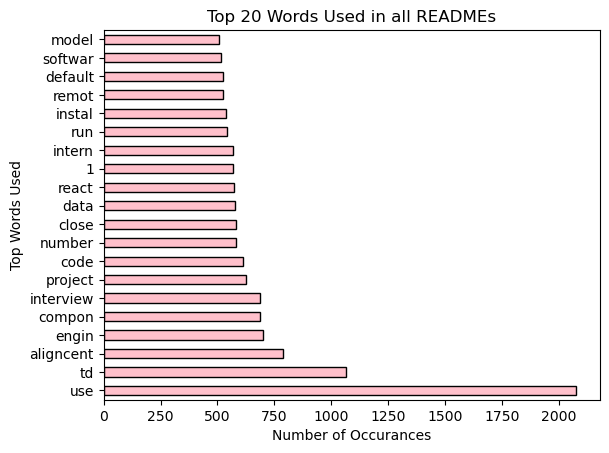

In [12]:
for col in all_freqs.columns:
    all_freqs[col].sort_values(ascending=False).head(20).plot.barh(ec='black', color='pink')
    plt.title(f'Top 20 Words Used in {col} READMEs')
    plt.xlabel('Number of Occurances')
    plt.ylabel('Top Words Used')
    plt.show()

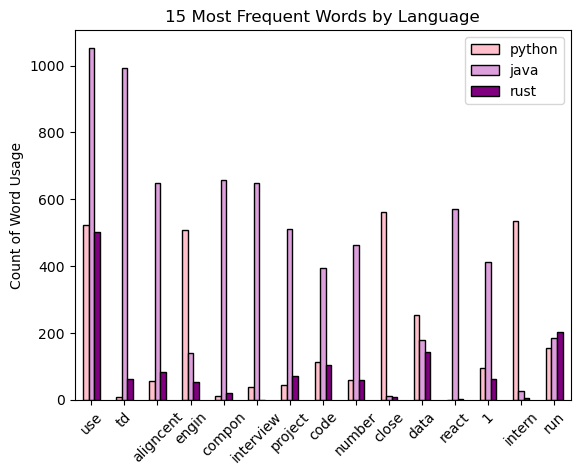

In [13]:
# Visualization of 15 Most Frequently Occurring Words
colors = ['pink', 'plum', 'purple']
all_freqs.sort_values('all', ascending=False)[['python', 'java', 'rust']].head(15).plot.bar(ec='black', color=colors).set(title='15 Most Frequent Words by Language')
plt.ylabel('Count of Word Usage')
plt.xticks(rotation=45)
plt.show()

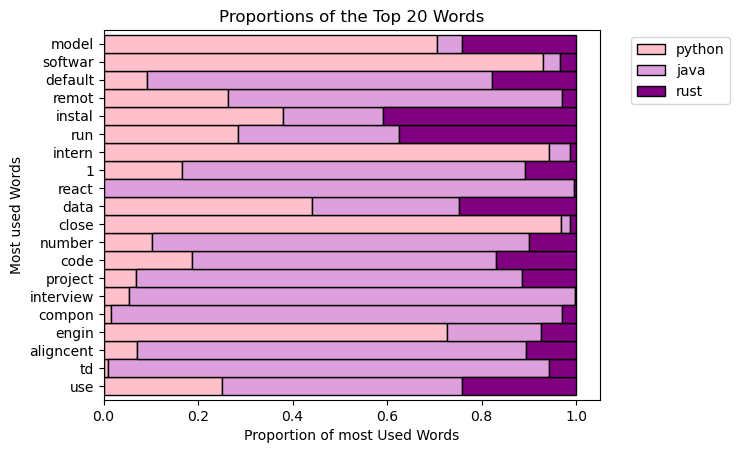

In [14]:
# Visualization of Top 20 Frequently Used Words - Proportionally Calculated

colors = ['pink', 'plum', 'purple']
all_freqs.sort_values('all', ascending=False
                       ).head(20).apply(
    lambda row: row/row['all'], axis=1
)[['python', 'java', 'rust']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1, color=colors).set(title='Proportions of the Top 20 Words')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Proportion of most Used Words')
plt.ylabel('Most used Words')
plt.show()

**Takeaway:** Most of the top used words do have even use by all three languages; it seems each word is used heavily by just one word. The excepts to this concept may include the words: "file", "run", "install", "data", "use".

#### Bigrams

In [15]:
# To remove all words which are actaully numbers, I'll run this function

language_words_only = e.get_only_alphabetical_words()

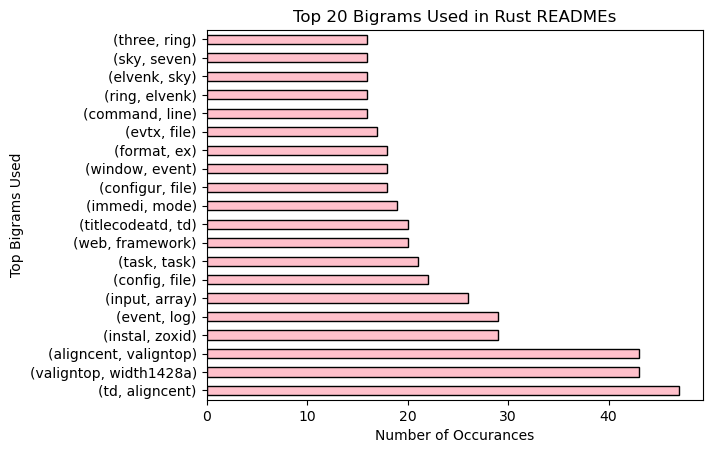

In [16]:
e.viz_rust_bigrams()

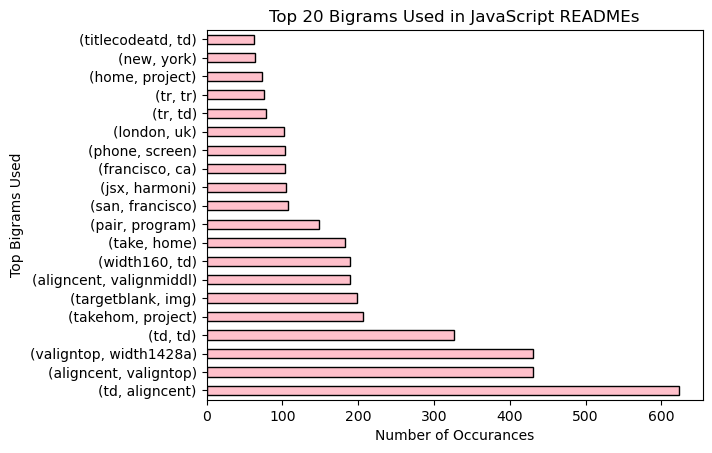

In [17]:
e.viz_java_bigrams()

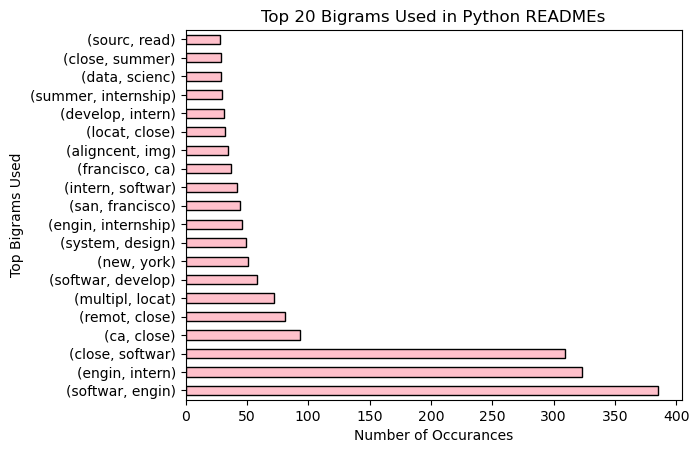

In [18]:
e.viz_python_bigrams()

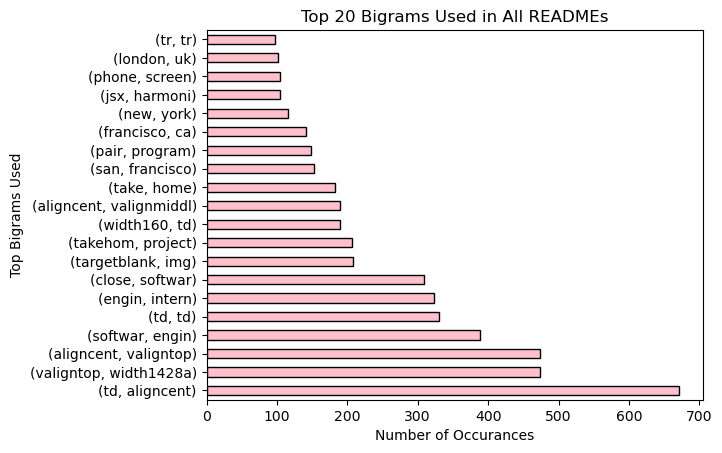

In [19]:
e.viz_all_bigrams()

#### Trigrams

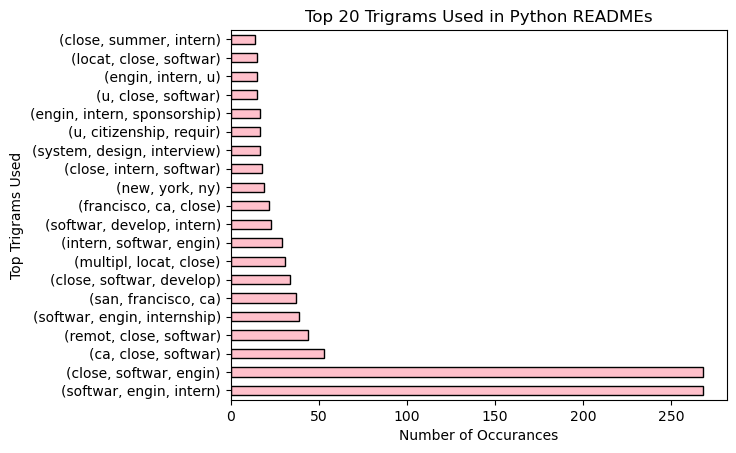

In [20]:
e.viz_python_trigrams()

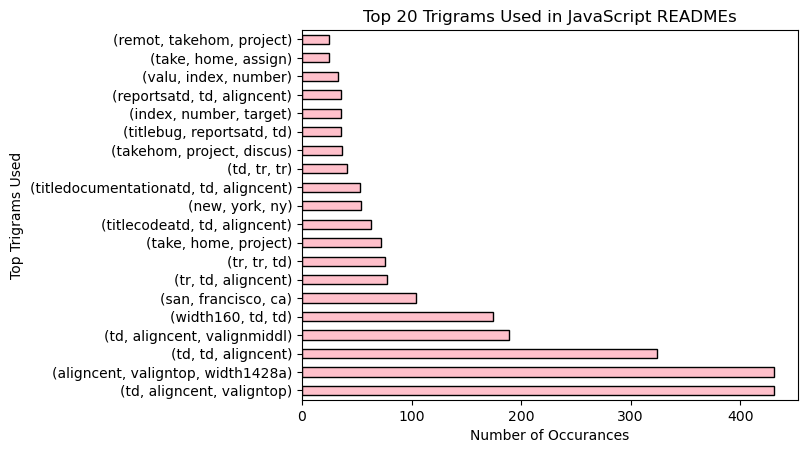

In [21]:
e.viz_java_trigrams()

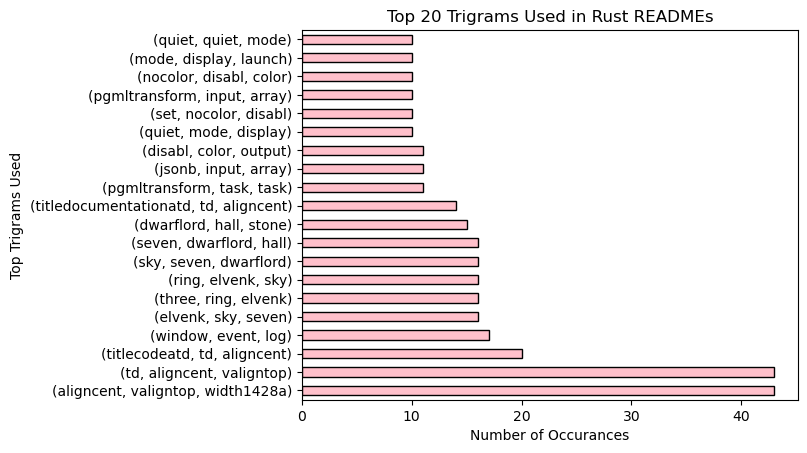

In [22]:
e.viz_rust_trigrams()

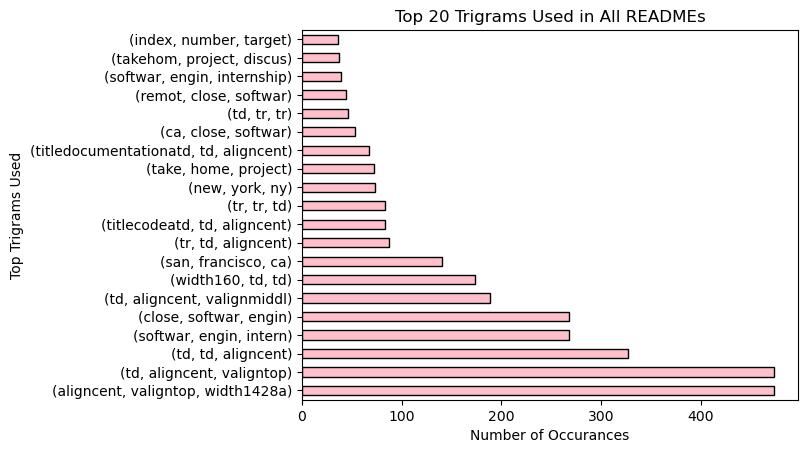

In [23]:
e.viz_all_trigrams()

#### Word Clouds

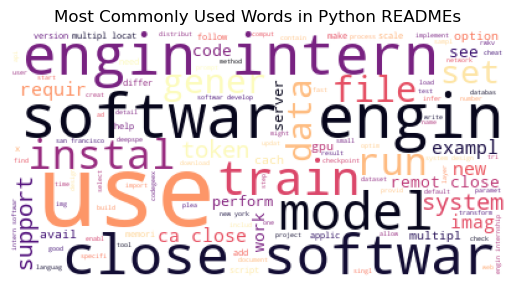

In [24]:
e.viz_python_word_cloud()

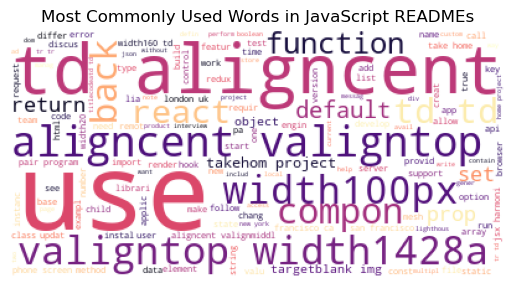

In [25]:
e.viz_java_word_cloud()

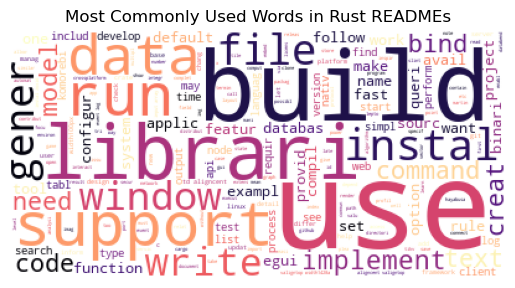

In [26]:
e.viz_rust_word_cloud()

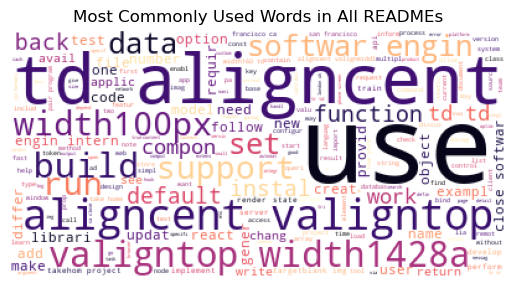

In [27]:
e.viz_all_word_cloud()

#### Sentiment 

In [28]:
# Average sentiment among Python READMEs

train[train['language'] == 'Python'].compound_sentiment.mean()

0.7759281250000001

In [29]:
# Average sentiment among JavaScript READMEs

train[train['language'] == 'JavaScript'].compound_sentiment.mean()

0.9587032258064517

In [30]:
# Average sentiment among Rust READMEs

train[train['language'] == 'Rust'].compound_sentiment.mean()

0.9823142857142859

In [31]:
# Average sentiment among all READMEs

train.compound_sentiment.mean()

0.9016956043956045

**Takeaway:** Sentiment in the Python READMEs is lower than the other two languages

/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:225: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:226: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:227: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:228: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(ax[1, 1].get_xticks(), rotation = 45)


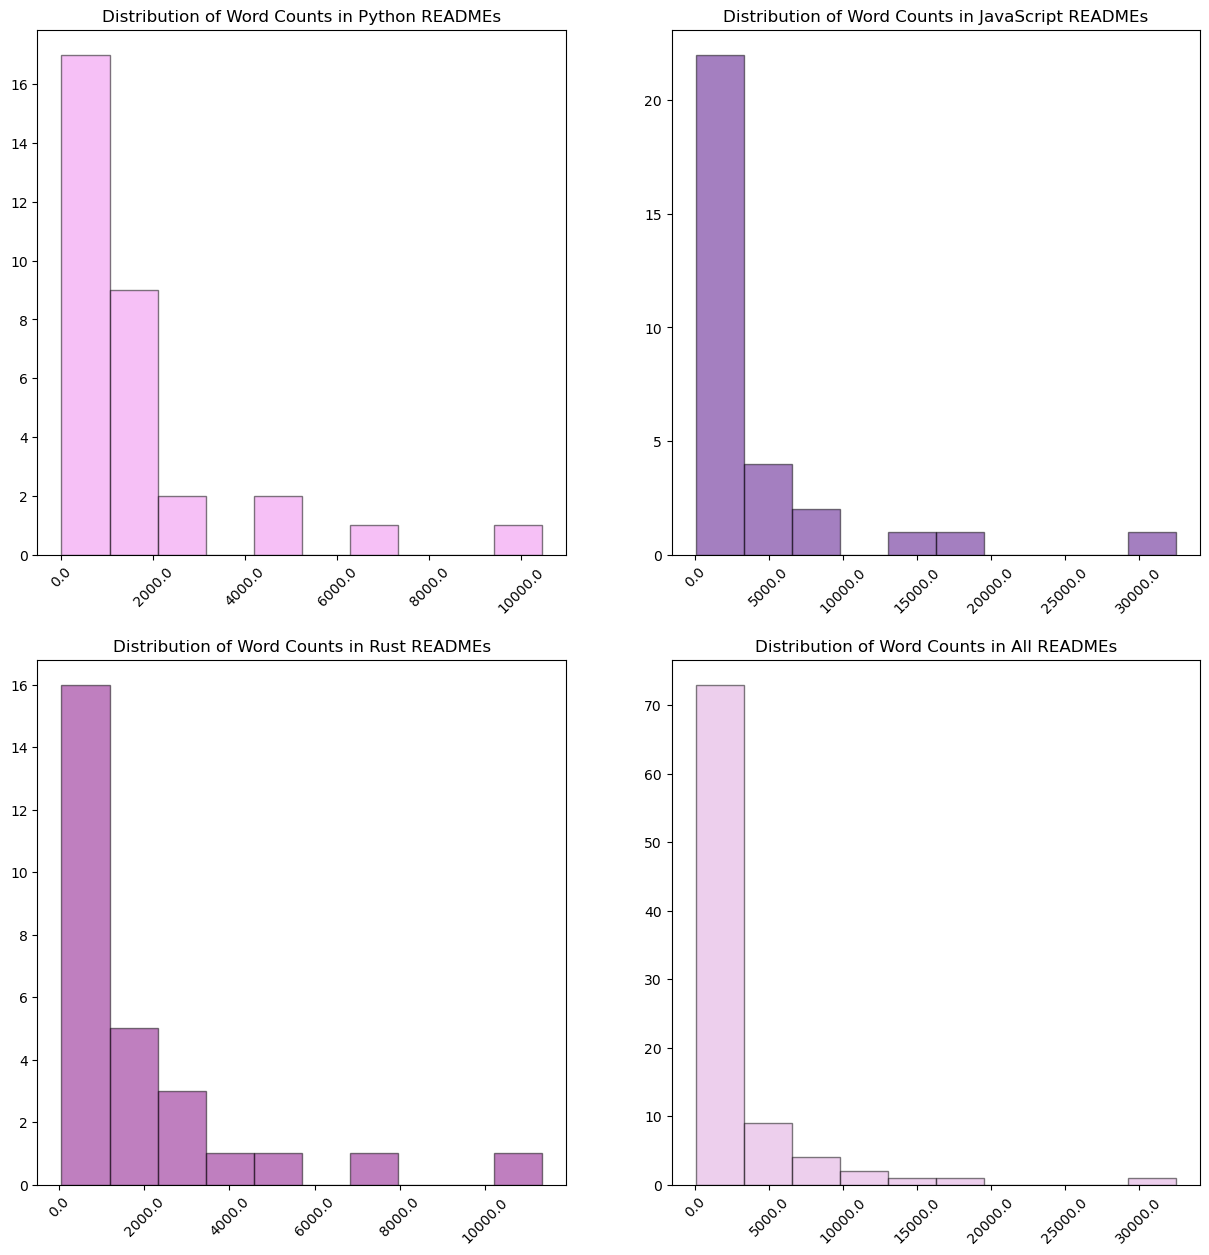

In [32]:
e.viz_word_counts(train)

In [33]:
train.head()

,repo,language,original,basic_clean,clean,stemmed,lemmatized,word_count,stopword_count,stopword_ratio,compound_sentiment
71,./cozodb/cozo,Rust,"<img src=""static/logo_c.png"" width=""200"" heigh...",img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,img srcstaticlogocpng width200 height175 altlo...,2320,884,38.10,0.9985
149,./OpenTalker/video-retalking,Python,"<div align=""center"">\n\n<h2>VideoReTalking <br...",div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalking br span stylef...,div aligncenterh2videoretalk br span stylefont...,div aligncenterh2videoretalk br span stylefont...,535,145,27.10,0.9766
6,./microsoft/Web-Dev-For-Beginners,JavaScript,[![GitHub license](https://img.shields.io/gith...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,github licensehttpsimgshieldsiogithublicensemi...,1422,507,35.65,0.9968
162,./ChanseyIsTheBest/NX-60FPS-RES-GFX-Cheats,Python,# NX-60FPS-RES-GFX-Cheats\n\n![fpsdemo1](https...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgit...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,nx60fpsresgfxcheatsfpsdemo1httpsuserimagesgith...,661,256,38.73,-0.9940
91,./datafuselabs/databend,Rust,"<h1 align=""center"">The Future of Cloud Data An...",h1 aligncenterthe future of cloud data analyti...,h1 aligncenterthe future cloud data analyticsh...,h1 aligncenterth futur cloud data analyticsh1d...,h1 aligncenterth futur cloud data analyticsh1d...,778,258,33.16,0.9971


/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:251: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:252: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticks(), rotation = 45)
/Users/carolinesmac/codeup-data-science/nlp_team_project/explore.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1, 1].set_xticklabels(ax[1, 1].get_xticks(), rotation = 45)


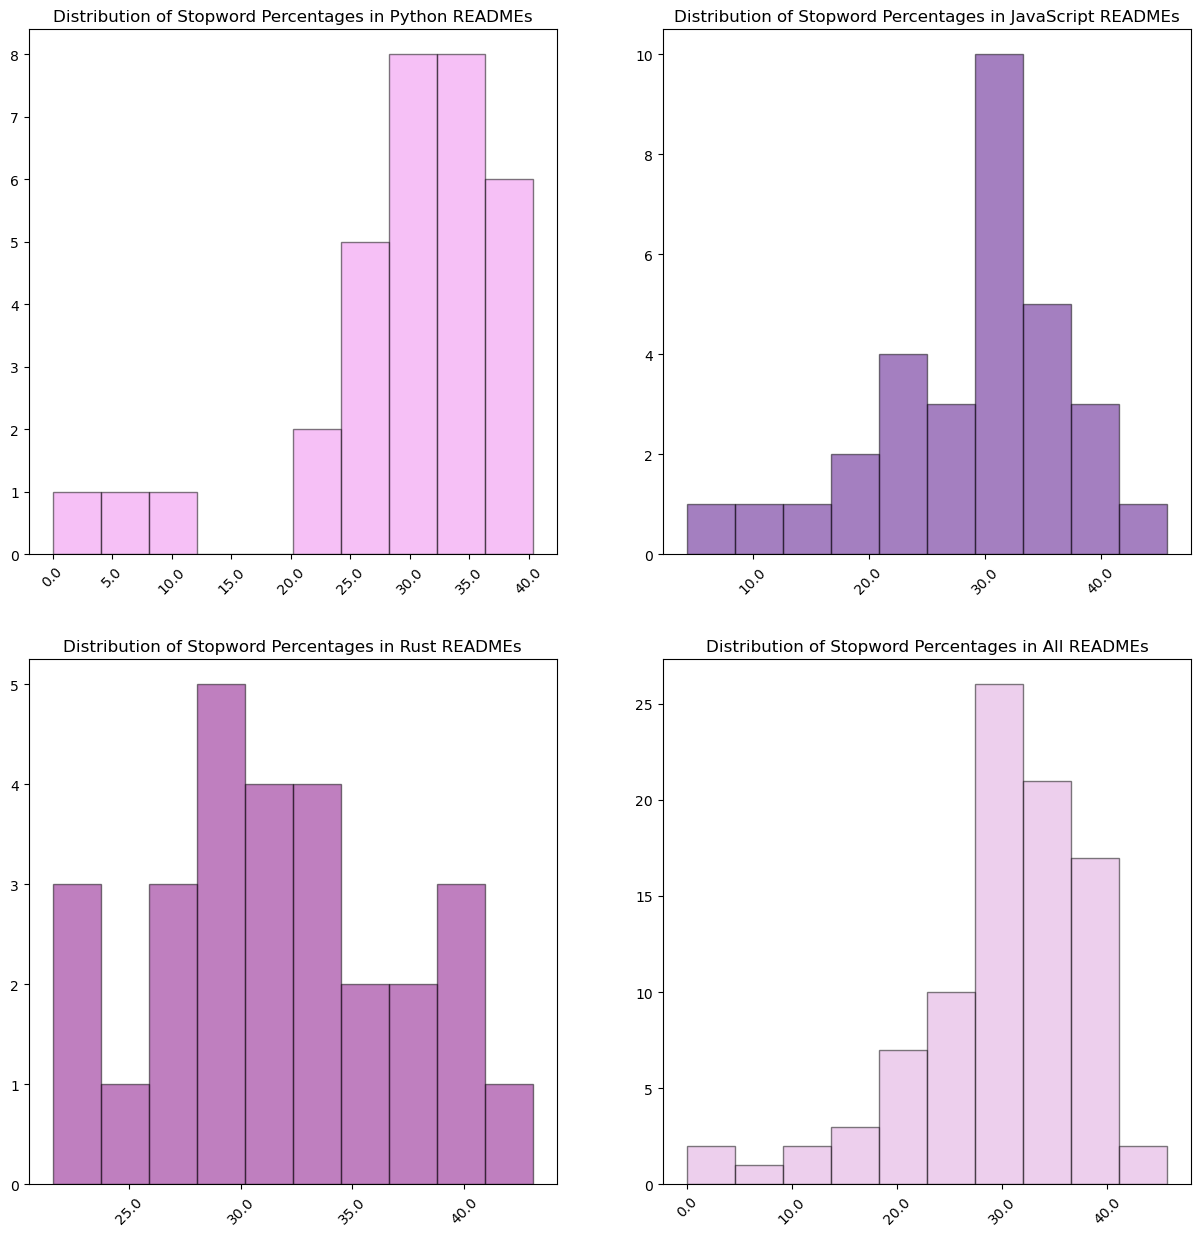

In [34]:
e.viz_stopword_ratios(train)